In [8]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
from bs4 import BeautifulSoup

# 1.- CONSUMIR UNA API PÚBLICA #

## Consumir API INE ##

In [9]:
# URL de la API proporcionada
url = "https://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/ICE56?date=20130101:20240701"

# Solicitud a la API del INE
response = requests.get(url)

# Verificamos el estado de la respuesta
if response.status_code == 200:
    # Parsear la respuesta en formato JSON
    data = response.json()


In [10]:
# Acceder a los datos dentro de la clave 'Data'
data_series = data['Data']

# Extraer las fechas y los valores del índice desde la serie de datos
fechas = [entry['Fecha'] for entry in data_series]
valores = [entry['Valor'] for entry in data_series]

# Convertir los datos a un DataFrame de pandas para facilitar el análisis
df = pd.DataFrame({
        'Fecha': pd.to_datetime(fechas, unit='ms'),
        'Valor': valores
    })

df = df.dropna() # por si hay datos no válidos
df['Año'] = df['Fecha'].dt.year  # Agrego la columna para el año

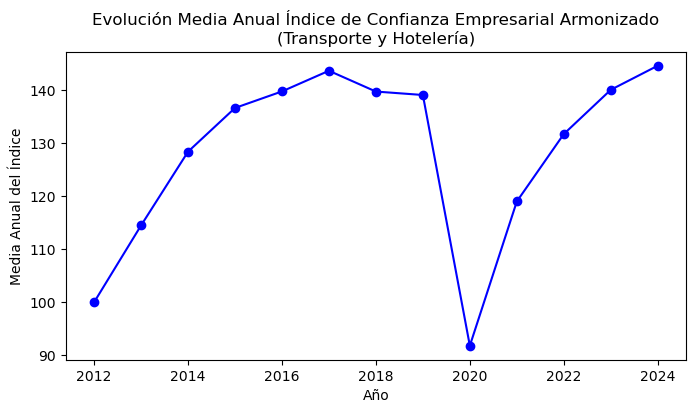

In [11]:
# Calcular la media anual
media_anual = df.groupby('Año')['Valor'].mean()

# Grafico evolución anual
plt.figure(figsize=(8, 4))
plt.plot(media_anual.index, media_anual.values, marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Media Anual del Índice')
plt.title('Evolución Media Anual Índice de Confianza Empresarial Armonizado\n(Transporte y Hotelería)')
plt.show()

## 2.- WEBSCRAPING ##

In [12]:
import requests
URL2 = "https://es.wikipedia.org/wiki/Gobierno_provisional_ruso"
page = requests.get(URL2)
# Comprobar que la solicitud fue exitosa
if response.status_code == 200:
    html_content = response.text
else:
    print("Error al realizar la solicitud:", response.status_code)

In [13]:
soup = BeautifulSoup(page.content, "html.parser") #MILLOR CONTENT QUE TEXT PER EVITAR PROBLEMES DE CODIFIC
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Gobierno provisional ruso - Wikipedia, la enciclopedia libre
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disable

- Em marco l'objetiu per aquest exercici d'extraure: el títol de la pàgina, les imatges i els enllaços. 
- He trobat un formatejador de codi que m'ha ajudat molt visualment, junt amb el visor de codi del navegador https://webformatter.com/html.
- En cas de web dinàmica hagués utilitzat Selenium.

In [14]:
# Extrae el título de la página
title_tag = soup.find('title')
if title_tag:
    title = title_tag.text
    print('Título de la página:', title)
else:
    print('No se encontró la etiqueta <title>')

# Extrae todas las imágenes
images = soup.find_all('img')
print('\nImágenes encontradas:')
for img in images:
    src = img.get('src')
    alt = img.get('alt')
    # Imprime la URL completa de la imagen
    if src:
        if not src.startswith('http'):
            src = 'https:' + src
        print(f'URL de la imagen: {src}')
        print(f'Texto alternativo: {alt}\n')

# Extrae todos los enlaces
links = soup.find_all('a')
print('\nEnlaces encontrados:')
for link in links:
    href = link.get('href')
    text = link.get_text()
    # Imprime el enlace completo
    if href:
        if not href.startswith('http'):
            href = 'https://es.wikipedia.org' + href
        print(f'Enlace: {href}')
        print(f'Texto del enlace: {text}\n')

Título de la página: Gobierno provisional ruso - Wikipedia, la enciclopedia libre

Imágenes encontradas:
URL de la imagen: https:/static/images/icons/wikipedia.png
Texto alternativo: 

URL de la imagen: https:/static/images/mobile/copyright/wikipedia-wordmark-en.svg
Texto alternativo: Wikipedia

URL de la imagen: https:/static/images/mobile/copyright/wikipedia-tagline-es.svg
Texto alternativo: La enciclopedia libre

URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Cscr-featured.svg/14px-Cscr-featured.svg.png
Texto alternativo: Artículo destacado

URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Russia.svg/125px-Flag_of_Russia.svg.png
Texto alternativo: None

URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Russian_coa_1917.svg/91px-Russian_coa_1917.svg.png
Texto alternativo: None

URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Russian_Provisional_Government_of_1917.PNG/

In [15]:
from IPython.display import Image, display
 # para visualizar imágenes

In [17]:
# Muestra las imágenes en el notebook
print('\nImágenes encontradas:')
for img in images:
    src = img.get('src')
    if src:
        # Asegúrate de que la URL sea absoluta
        if not src.startswith('http'):
            src = 'https:' + src
        display(Image(url=src))
        print(f'URL de la imagen: {src}\n')



Imágenes encontradas:


URL de la imagen: https:/static/images/icons/wikipedia.png



URL de la imagen: https:/static/images/mobile/copyright/wikipedia-wordmark-en.svg



URL de la imagen: https:/static/images/mobile/copyright/wikipedia-tagline-es.svg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Cscr-featured.svg/14px-Cscr-featured.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Russia.svg/125px-Flag_of_Russia.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Russian_coa_1917.svg/91px-Russian_coa_1917.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Russian_Provisional_Government_of_1917.PNG/250px-Russian_Provisional_Government_of_1917.PNG



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Russia.svg/20px-Flag_of_Russia.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Russia.svg/20px-Flag_of_Russia.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/%D0%93._%D0%95._%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2.jpg/200px-%D0%93._%D0%95._%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2.jpg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Governo_provvisorio_russo_marzo_1917.jpg/300px-Governo_provvisorio_russo_marzo_1917.jpg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/CampesinosRusos--throughrussianre00willuoft.jpg/220px-CampesinosRusos--throughrussianre00willuoft.jpg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/KornilovAlbertThomasK%C3%A9renskiPrimeroDeMayo1917.png/220px-KornilovAlbertThomasK%C3%A9renskiPrimeroDeMayo1917.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/20_%D1%80%D1%83%D0%B1%D0%BB%D0%B5%D0%B9_%D0%9A%D0%B5%D1%80%D0%B5%D0%BD%D0%BA%D0%B8_1917.jpg/220px-20_%D1%80%D1%83%D0%B1%D0%BB%D0%B5%D0%B9_%D0%9A%D0%B5%D1%80%D0%B5%D0%BD%D0%BA%D0%B8_1917.jpg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D1%82%D0%B2%D0%BE_%28%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%29.jpg/220px-%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D1%82%D0%B2%D0%BE_%28%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%29.jpg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Kerensky--insiderussianrev00dorrrich.png/200px-Kerensky--insiderussianrev00dorrrich.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/19170704_Riot_on_Nevsky_prosp_Petrograd.jpg/200px-19170704_Riot_on_Nevsky_prosp_Petrograd.jpg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/General_Kornilov_and_his_staff.png/200px-General_Kornilov_and_his_staff.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/THIRD_PROVISIONAL_CABINET_OF_RUSSIA.jpg/240px-THIRD_PROVISIONAL_CABINET_OF_RUSSIA.jpg



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Batall%C3%B3n-muerte-rusia--insiderussianrev00dorrrich.png/240px-Batall%C3%B3n-muerte-rusia--insiderussianrev00dorrrich.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/es/timeline/eanax3y0ujhkrwuqkzud0v6awa2o27h.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Wikidata-logo.svg/20px-Wikidata-logo.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Commons-logo.svg/15px-Commons-logo.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Wikidata-logo.svg/20px-Wikidata-logo.svg.png



URL de la imagen: https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Commons-logo.svg/15px-Commons-logo.svg.png



URL de la imagen: https://login.wikimedia.org/wiki/Special:CentralAutoLogin/start?type=1x1



URL de la imagen: https:/static/images/footer/wikimedia-button.svg



URL de la imagen: https:/w/resources/assets/poweredby_mediawiki.svg

